In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

In [24]:
df = pd.read_csv("ecommerce.csv")

In [25]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [27]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [28]:
df["Time on App"]

0      12.655651
1      11.109461
2      11.330278
3      13.717514
4      12.795189
         ...    
495    13.566160
496    11.695736
497    11.499409
498    12.391423
499    12.418808
Name: Time on App, Length: 500, dtype: float64

In [29]:
print("The Count =", df["Time on App"].count())
print("The Mean =", df["Time on App"].mean())
print("The Max =", df["Time on App"].max())
print("The Min =", df["Time on App"].min())
print("The Median =", df["Time on App"].median())

The Count = 500
The Mean = 12.052487937166132
The Max = 15.126994288792469
The Min = 8.508152176032603
The Median = 11.983231258825267


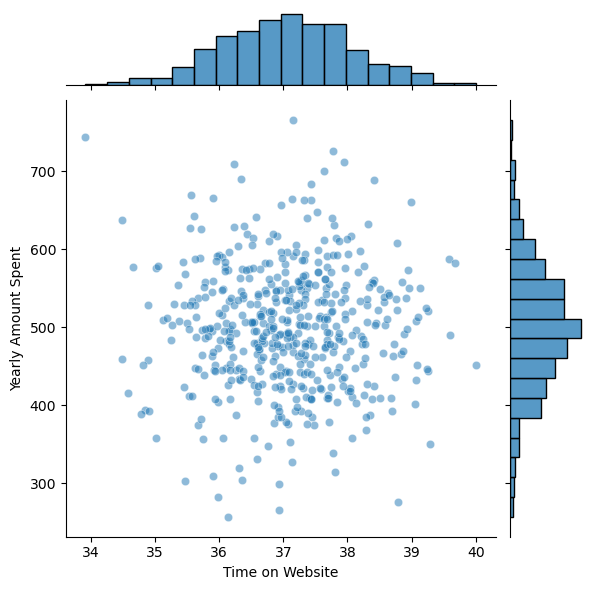

In [ ]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data=df, alpha=0.5)

#by using the alpha we say that adjust the color based on the count of points in a location 
# if more poinst are there more darker the dot becomes

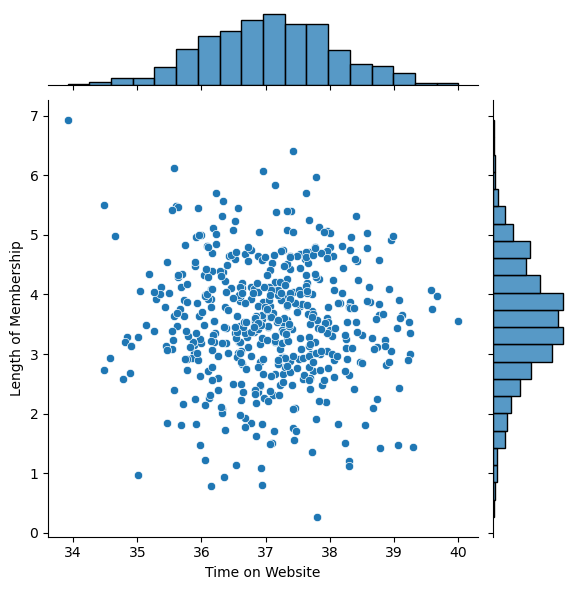

In [32]:
sns.jointplot(x="Time on Website", y="Length of Membership", data=df)

<Axes: xlabel='Time on Website', ylabel='Length of Membership'>

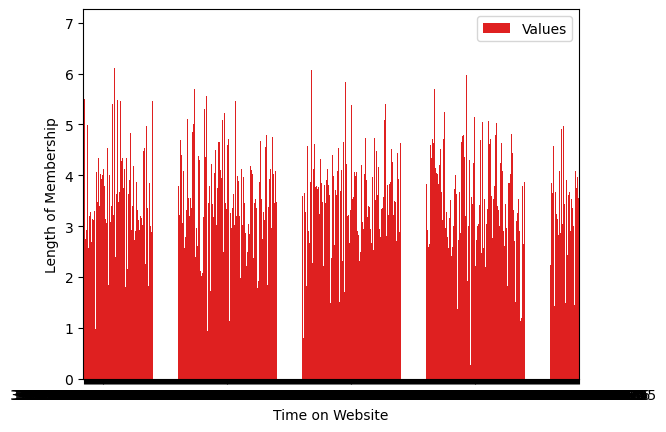

In [40]:
sns.barplot(x="Time on Website", y="Length of Membership", data=df, color="red", label="Values")

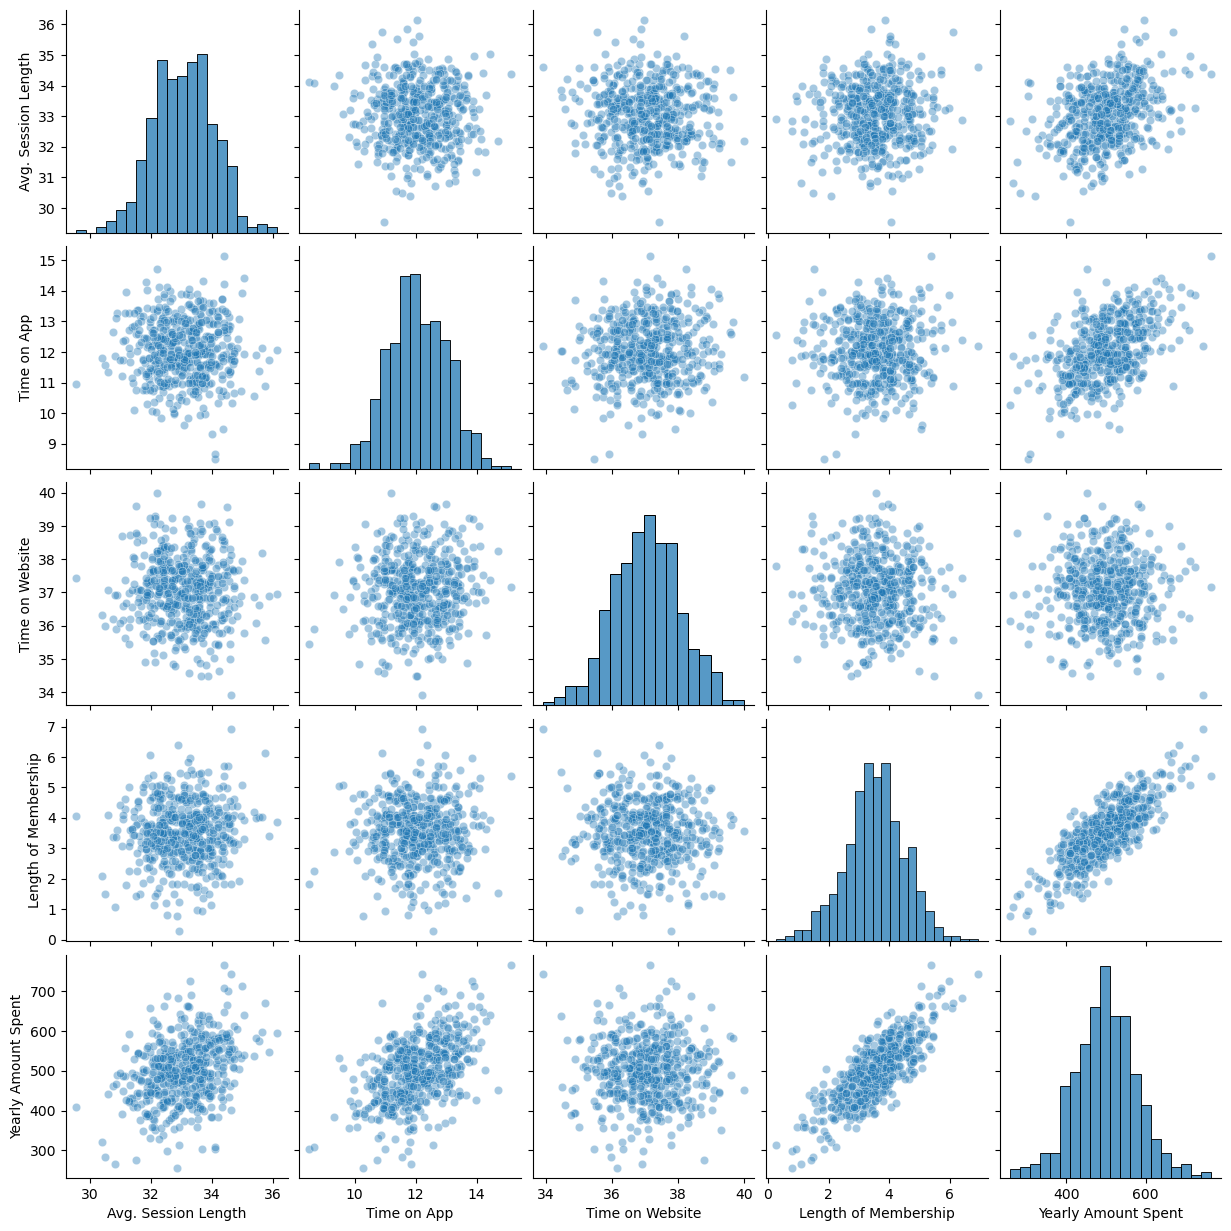

In [43]:
sns.pairplot(df, kind="scatter", plot_kws={"alpha": 0.4})

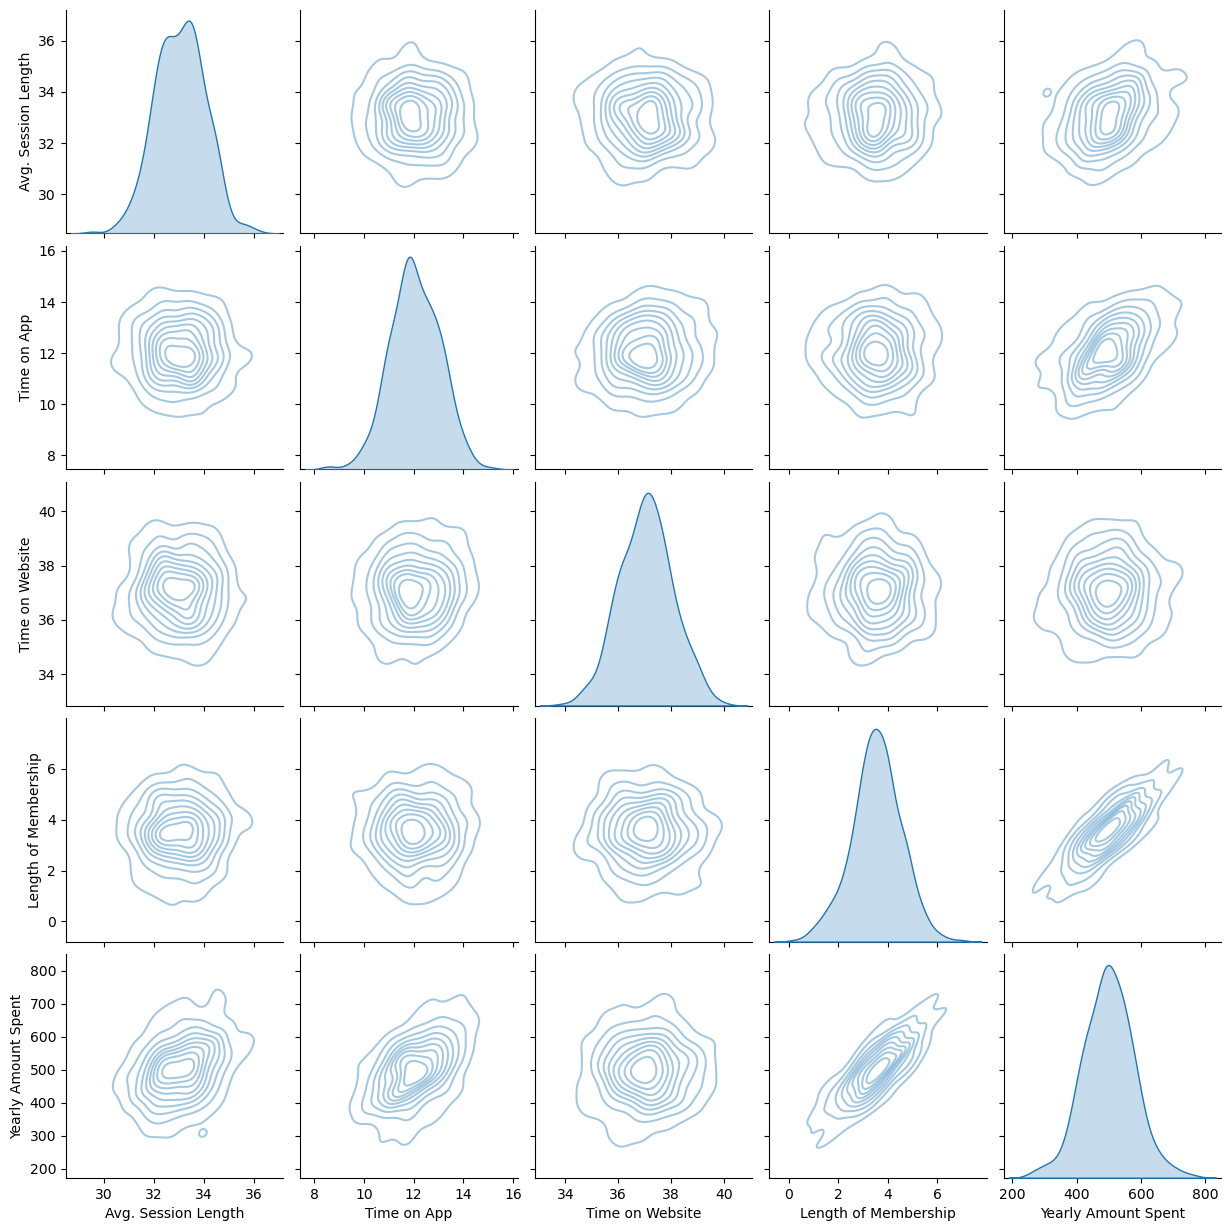

In [46]:
sns.pairplot(df, kind="kde", plot_kws={"alpha": 0.4})

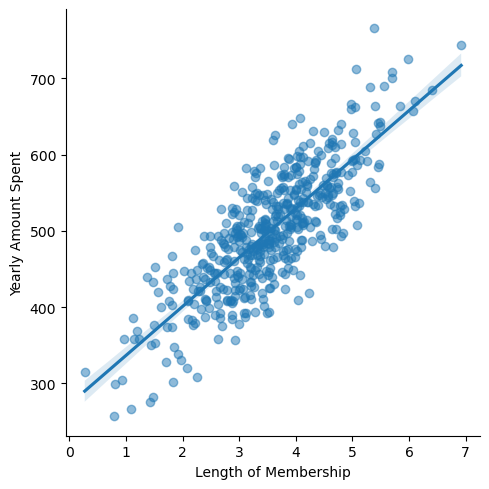

In [50]:
sns.lmplot(
    x= "Length of Membership",
    y= "Yearly Amount Spent",
    data = df,
    scatter_kws = {"alpha": 0.5}
)


In [53]:
from sklearn.model_selection import train_test_split

In [59]:
X = df[['Avg. Session Length','Time on App', 'Time on Website', 'Length of Membership']]
X

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [60]:
Y = df['Yearly Amount Spent']
Y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
          ...    
495    573.847438
496    529.049004
497    551.620145
498    456.469510
499    497.778642
Name: Yearly Amount Spent, Length: 500, dtype: float64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [69]:
X_train

,Avg. Session Length,Time on App,Time on Website,Length of Membership
253,31.724203,13.172287,36.199753,3.557814
351,32.189845,11.386776,38.197483,4.808320
216,32.745150,10.012583,38.354960,3.108911
92,33.471601,11.662263,36.050241,3.997255
94,32.197724,11.830231,36.633857,4.193325
...,...,...,...,...
460,34.034164,13.592513,36.838657,3.605934
3,34.305557,13.717514,36.721283,3.120179
484,33.448125,11.903757,36.874544,2.782758
438,32.149061,10.047315,37.181447,3.535088


In [70]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
254,32.711119,12.326291,36.673878,3.350279
178,32.635878,12.178573,35.674256,4.131755
473,31.609840,12.710701,36.166463,2.562819
493,32.060914,12.625433,35.539142,5.412358
336,32.302553,11.979061,38.269061,3.532862
...,...,...,...,...
179,33.075703,12.319845,37.819155,3.442799
314,32.878474,13.032535,37.870952,4.693732
408,33.000850,11.230743,36.995290,3.781704
129,32.771715,11.540832,37.526421,2.924021


X_train	The features (inputs) used to train the model (70% of X)
X_test	The features used to test the model (30% of X)
Y_train	The labels/targets corresponding to X_train (70% of Y)
Y_test	The labels/targets corresponding to X_test (30% of Y)

test_size=0.3 means 30% of your data will be used for testing, and 70% for training.
This sets the random seed for how the data is shuffled before splitting.

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [77]:
lm.fit(X_train, Y_train)
lm.coef_

array([26.09981483, 38.36826112,  0.24108836, 61.38421986])

In [79]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   26.099815
Time on App           38.368261
Time on Website        0.241088
Length of Membership  61.384220


In [83]:
predictions = lm.predict(X_test)
print(predictions)

[489.58932018 529.68712374 427.13528437 610.40213409 477.19546204
 411.82884761 555.02229365 457.90214069 374.28325228 675.16983099
 547.91287476 532.92519006 417.22605395 445.23725446 549.49275694
 441.19155888 463.13176599 455.33997323 455.4146572  422.37722288
 463.40047044 479.97569232 306.26804209 497.75967424 499.7972216
 478.49054597 597.99291392 519.04970648 458.35534485 563.31035464
 547.44090393 460.43732302 539.31703516 421.40725738 518.27637856
 464.3448348  500.5414167  584.54754834 470.59480033 469.26575637
 423.86131995 543.2251443  627.74160885 450.34380777 417.47495886
 425.14965522 424.5462053  496.90818839 524.32379094 537.53900763
 449.69162459 410.03409059 389.54283157 608.42559042 532.17121764
 494.54841393 455.94893209 256.14283574 472.67823099 543.32881252
 485.73490611 500.37114498 480.19179379 568.53061934 666.72728294
 544.91399252 478.6238746  535.13996825 426.53842539 661.56631631
 492.97638729 506.59196777 443.94409024 480.86802007 683.05283936
 572.492435

Text(0.5, 1.0, 'Predictions vs Actual Values')

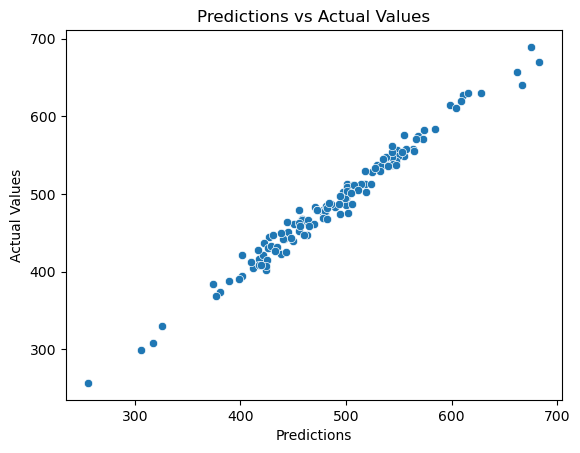

In [88]:
sns.scatterplot(x=predictions, y=Y_test)
plt.xlabel("Predictions")
plt.ylabel("Actual Values")
plt.title("Predictions vs Actual Values")

In [97]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(Y_test, predictions))
print("RMSE: ", math.sqrt(mean_squared_error(Y_test, predictions)))

Mean Absolute Error:  8.08583121730572
Mean Squared Error:  101.74431010677615
RMSE:  10.086838459436938


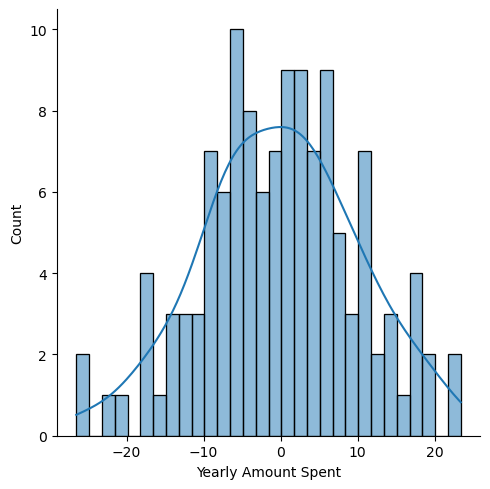

In [107]:
residuals = Y_test - predictions
sns.displot(residuals, bins=30, kde=True)

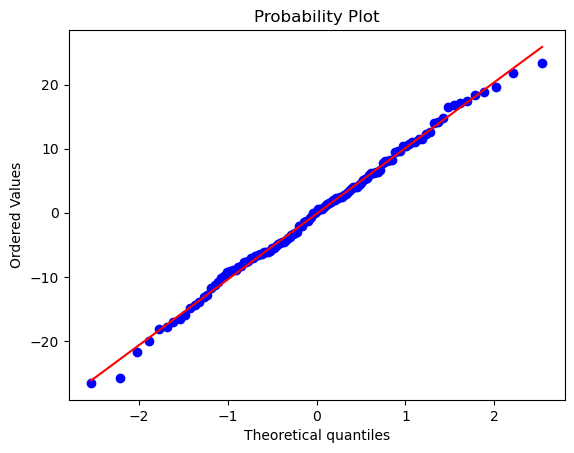

In [111]:
import pylab
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()